# Simple pendolum

$$ \frac{d^2 \theta}{dt^2} + \frac{g}{l} \sin\theta = 0 $$

* $l$ = pendolum lenght
* $g$ = gravity acceleration = 9.81 $m/s^2$

## Approximate solution

Small angle approximation: $\sin\theta \simeq \theta$

$$ \frac{d^2 \theta}{dt^2} + \frac{g}{l} \theta = 0 $$

$$\theta(t) = \theta_0 \cos(\omega t) , \quad \omega = \sqrt{ \frac{g}{l} } , \quad T = \frac{2\pi}{\omega} = 2\pi \sqrt{ \frac{l}{g} } $$



In [167]:
import numpy as np

def pendulum_approx(t,l=1.,g=9.81,theta0=[0.1,0]):
    omega = np.sqrt(g/l)
    theta = theta0[0]*np.cos(omega*t)
    thetadot = theta0[1]-omega*theta0[0]*np.sin(omega*t)
    return [ theta, thetadot ]

def pendulum_ode(theta,t,l=1.,g=9.81):
    return [ theta[1], -(g/l)*np.sin(theta[0]) ]

In [247]:
from scipy.integrate import odeint

g = 9.81
l = 10.

t = np.linspace(0,50,500)

# initial conditions
theta0 = [0.4,0] # start from misplaced pendolum, with 0 initial speed

# approximate solution
theta_approx = np.array([ pendulum_approx(ti,l,g,theta0) for ti in t ])

# solve differential equations
theta = odeint(pendulum_ode,theta0,t,args=(l,g)) 

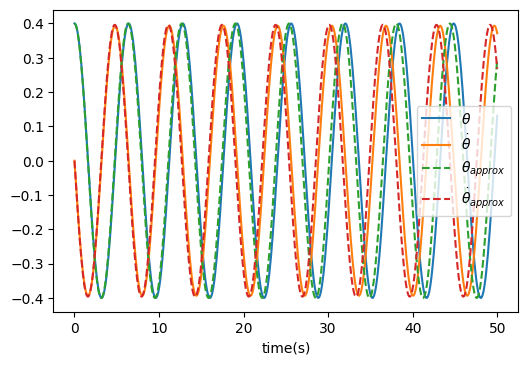

In [248]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.plot(t,theta[:,0],'-',label=r'$\theta$')
plt.plot(t,theta[:,1],'-',label=r'$\dot{\theta}$')
plt.plot(t,theta_approx[:,0],'--',label=r'$\theta_{approx}$')
plt.plot(t,theta_approx[:,1],'--',label=r'$\dot{\theta}_{approx}$')

plt.xlabel('time(s)')
plt.ylabel('')
plt.legend(loc='best')
plt.show()

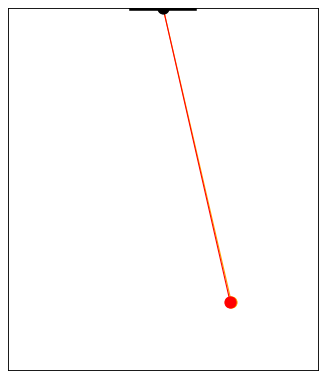

In [254]:
# plot one time snapshot

i = 10

x0 = 0
y0 = 0
x1 =  l*np.sin(theta[i][0])
y1 = -l*np.cos(theta[i][0])
x1app =  l*np.sin(theta_approx[i][0])
y1app = -l*np.cos(theta_approx[i][0])

plt.figure(figsize=(5,6),dpi=80)

plt.plot([x0,x1],[y0,y1],"-",linewidth=1,color='orange') 
plt.plot(x1,y1,'o',markersize=10,color='orange')

plt.plot([x0,x1app],[y0,y1app],"-",linewidth=1,color='red') 
plt.plot(x1app,y1app,'o',markersize=10,color='red')

plt.plot([-1.,1.],[0,0],'black',linewidth=5)
plt.plot(x0,y0,'o',markersize=10,color="black")
plt.xlim([-5.0,5.0])
plt.ylim([-12,0])

plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

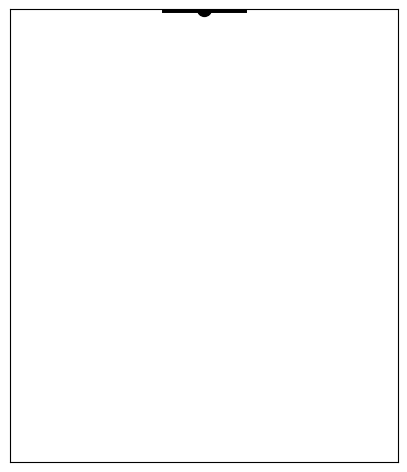

In [250]:
fig, ax = plt.subplots(figsize=(5,6),dpi=100)

plt.plot([-1.,1.],[0,0],'black',linewidth=5)
plt.plot(x0,y0,'o',markersize=10,color="black")

line, = plt.plot([],[],'-',linewidth=2,color='orange')
ball, = plt.plot([],[],'o',markersize=10,color='orange')

line_app, = plt.plot([],[],'-',linewidth=2,color='red')
ball_app, = plt.plot([],[],'o',markersize=10,color='red')

plt.xlim([-5.0,5.0])
plt.ylim([-12,0])

plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

In [251]:
from matplotlib.animation import FuncAnimation
%matplotlib inline
from IPython.display import HTML, Image

def pendolum_init():
    line.set_data([], [])
    #line_app.set_data([], [])
    return (line,)

def pendolum_animate(i):
    x0 = 0
    y0 = 0
    x1 = l*np.sin(theta[i][0])
    y1 = -l*np.cos(theta[i][0])
    x1app = l*np.sin(theta_approx[i][0])
    y1app = -l*np.cos(theta_approx[i][0])
    ball.set_data([x1],[y1])
    line.set_data([x0,x1],[y0,y1])
    ball_app.set_data([x1app],[y1app])
    line_app.set_data([x0,x1app],[y0,y1app])
    return (line,)

anim = FuncAnimation(fig,pendolum_animate,frames=range(len(theta)),init_func=pendolum_init,blit=True)

HTML(anim.to_html5_video())

In [252]:
anim.save('pendolum_simple.gif', writer='imagemagick', fps=30)

In [253]:
Image(url='pendolum_simple.gif')